In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
import tensorflow as tf

## Overview

In [2]:
df = pd.read_csv("Titanicset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
for col in df.columns:
    msg = "Column : {:>10}\t persen of NaN value : {:2f}%".format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

Column : PassengerId	 persen of NaN value : 0.000000%
Column :   Survived	 persen of NaN value : 0.000000%
Column :     Pclass	 persen of NaN value : 0.000000%
Column :       Name	 persen of NaN value : 0.000000%
Column :        Sex	 persen of NaN value : 0.000000%
Column :        Age	 persen of NaN value : 19.865320%
Column :      SibSp	 persen of NaN value : 0.000000%
Column :      Parch	 persen of NaN value : 0.000000%
Column :     Ticket	 persen of NaN value : 0.000000%
Column :       Fare	 persen of NaN value : 0.000000%
Column :      Cabin	 persen of NaN value : 77.104377%
Column :   Embarked	 persen of NaN value : 0.224467%


##### 
1. In 12 columns, it can be seen that the cabin column has the largest missing value so it needs to be deleted
2. And the age and embarked have missing value

In [8]:
num = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]
cat = ["Name","Sex","Ticket","Cabin","Embarked"]

In [9]:
df[num].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 
1. most passengers did not survive (close to 0)
2. Passengers buy tickets on average in the 2nd class
3. Passenger average age 29
4. the average passenger is a couple and has no parents
5. Passenger fare $32/people

In [10]:
df[cat].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


##  Exploratory Data Analysis

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

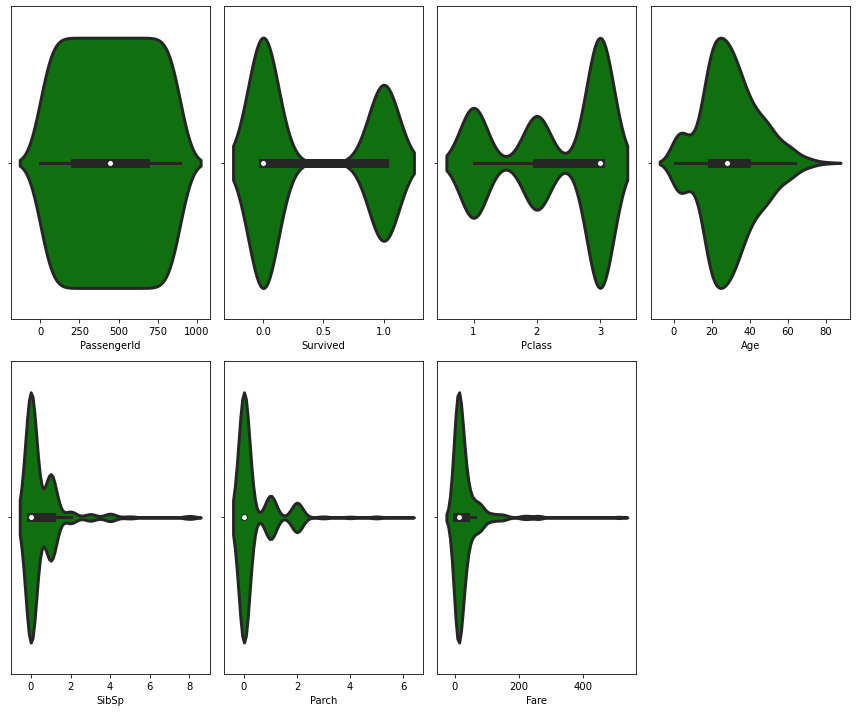

In [12]:
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.violinplot(df[num[i]], color = "green", orient = "v")
    plt.tight_layout()

##### 
1. In the PcClass variable, the data is in the form of a negative skew
2. On the variables Age and SibSp skew is positive
3. There are several outliers that need to be removed in the process
4. Overall passanger not survived (to 0)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


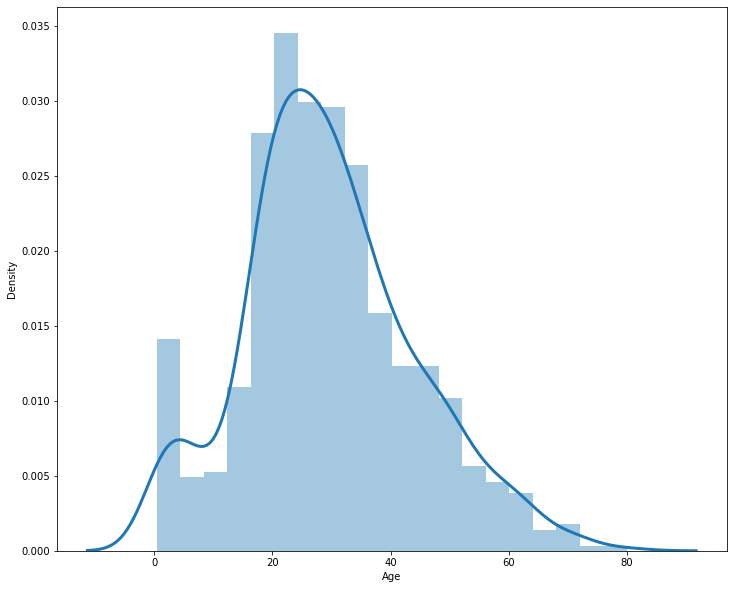

In [13]:
sns.distplot(df.Age)
plt.show()

##### It can be seen that the average age is in the range of 29 and there are still baby passengers

In [14]:
df.drop(['Name', 'PassengerId','Cabin'], axis=1, inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


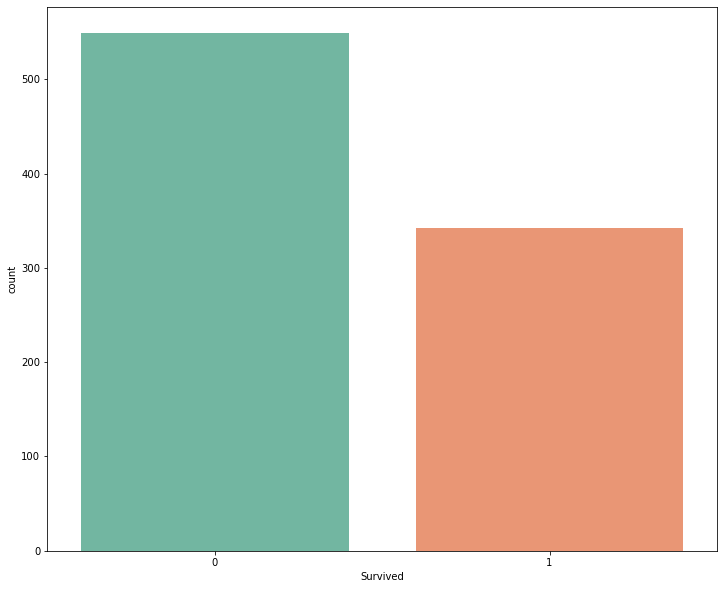

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


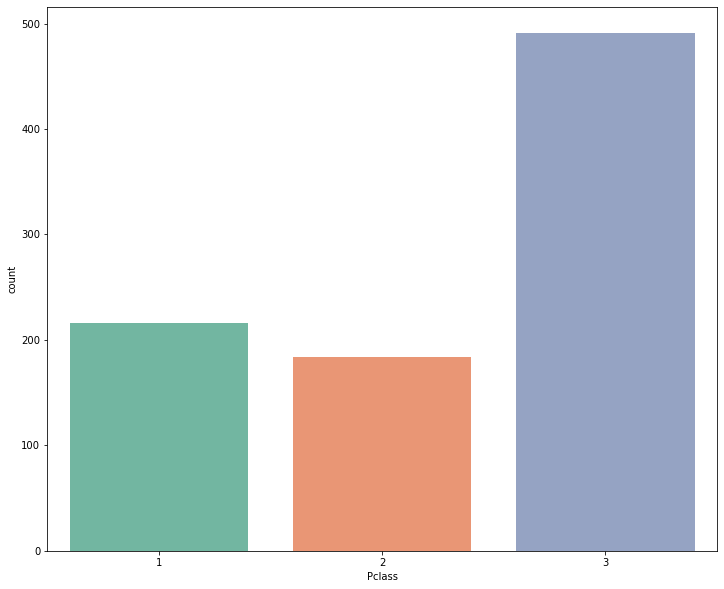

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


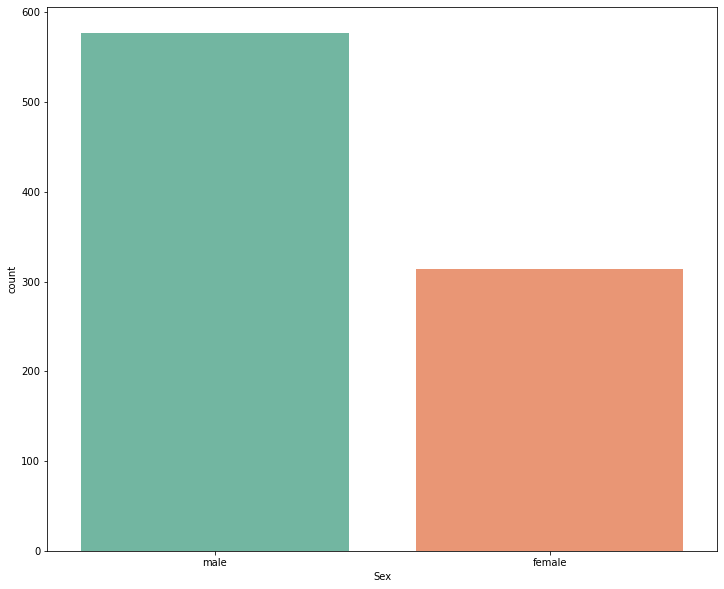

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


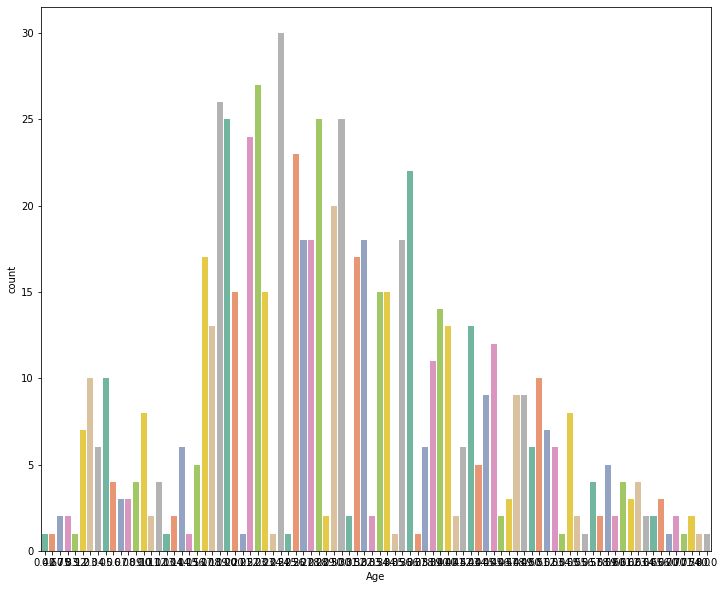

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


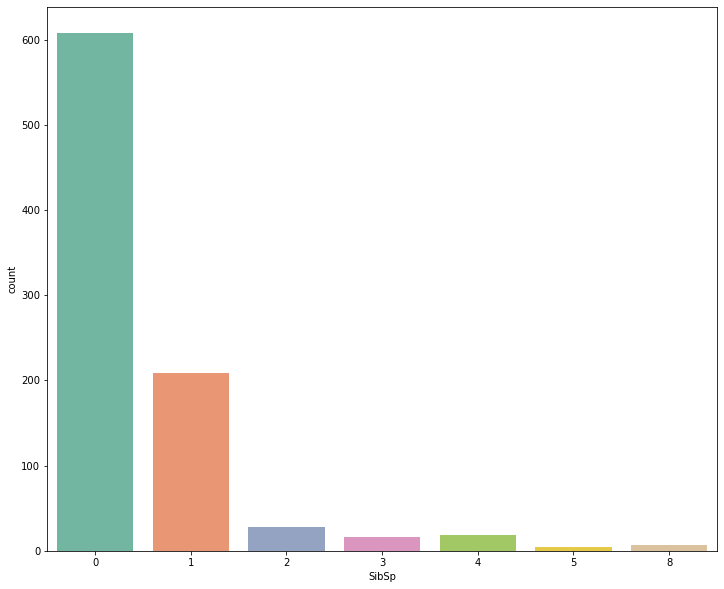

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


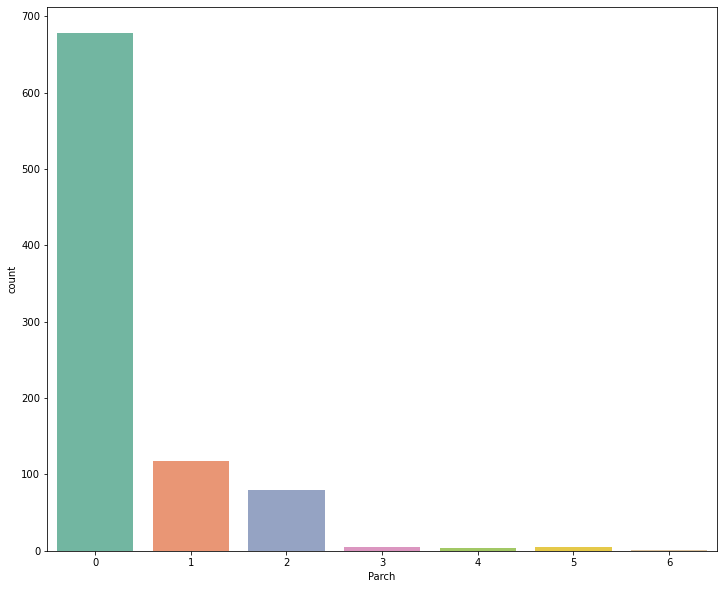

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


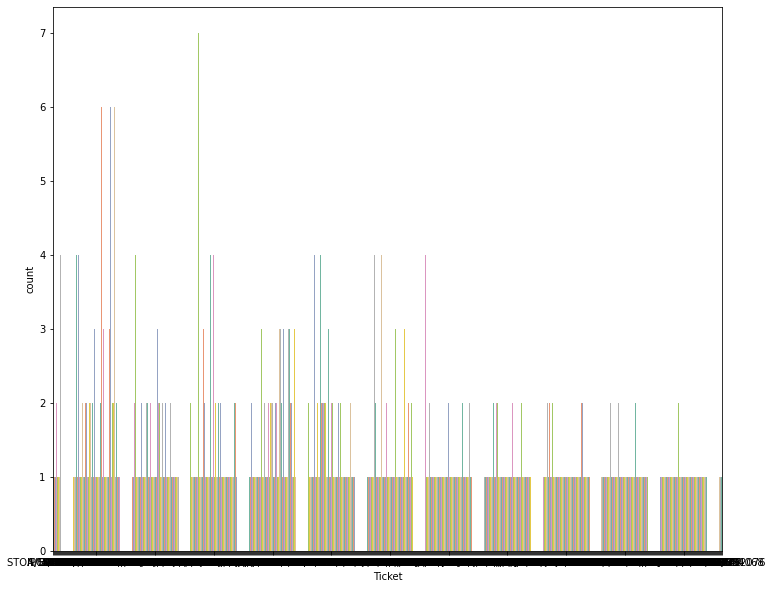

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


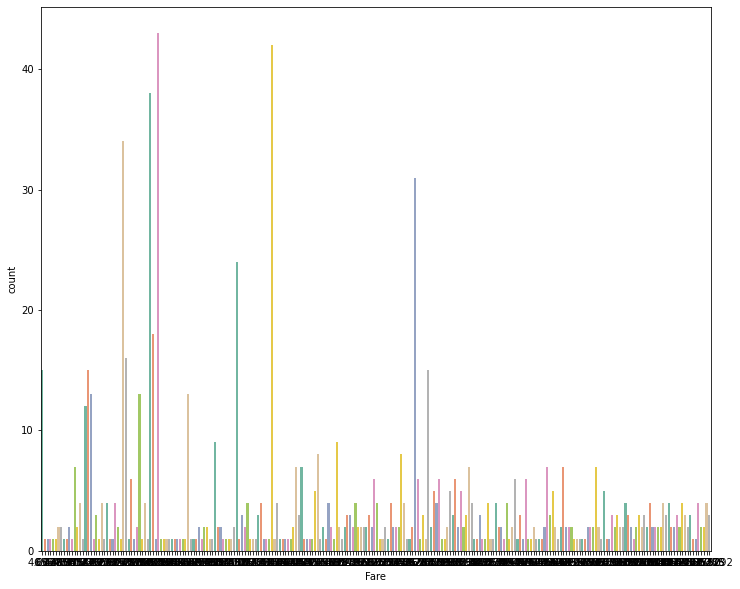

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


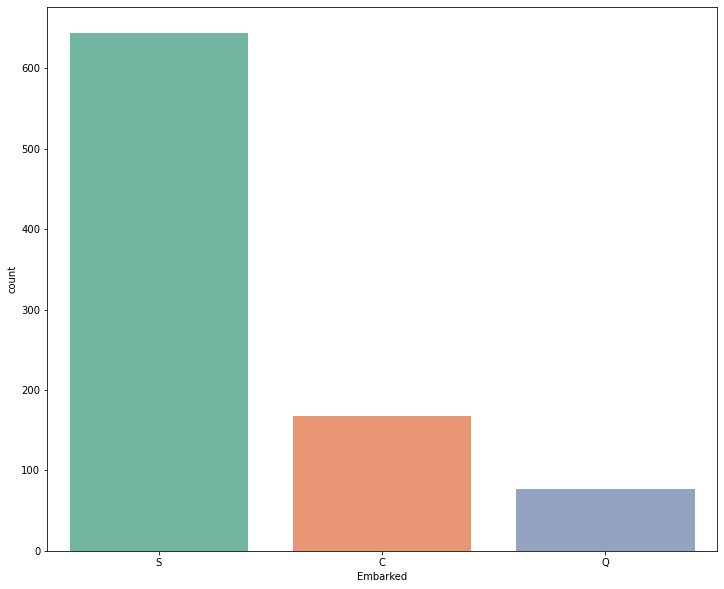

In [15]:
for i in df.columns:
    sns.countplot(df[i], palette = "Set2")
    plt.show()

#####
1. Most passengers are unsafe
2. Most in class 3
3. There are more men than women
4. Most do not have parents as evidenced by SibSp 0
5. And most of them are young unpaired as evidenced by 0
6. Mostly depart from southampton port

## DATA CLEANING

In [16]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [17]:
# imputation Age with mean
df["Age"].fillna(df["Age"].mean(), inplace=True)
#imputation Embarked with modus
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
# check duplicate
print(df.duplicated().sum())
# delete duplicated data
df.drop_duplicates(inplace=True)

15


In [20]:
# Handling outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

new = np.array([False]* len(df))
for col in ['Age','Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    new = ((df[col] < low_limit) | (df[col] > high_limit)) | new
    
df1 = df[~new]
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 876
Jumlah baris setelah memfilter outlier: 711


In [26]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
5,0,3,male,29.699118,0,0,330877,8.4583,Q


In [27]:
#normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
df1['Pclass_norm'] = MinMaxScaler().fit_transform(df1['Pclass'].values.reshape(len(df1), 1))
df1['Fare_norm'] = MinMaxScaler().fit_transform(df1['Fare'].values.reshape(len(df1), 1))
df1['SibSp_norm'] = MinMaxScaler().fit_transform(df1['SibSp'].values.reshape(len(df1), 1))
df1['Parch_norm'] = MinMaxScaler().fit_transform(df1['Parch'].values.reshape(len(df1), 1))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30468\3559256511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pclass_norm'] = MinMaxScaler().fit_transform(df1['Pclass'].values.reshape(len(df1), 1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30468\3559256511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fare_norm'] = MinMaxScaler().fit_transform(df1['Fare'].values.reshape(len(df1), 1))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30468\3559256511.py:3: SettingWithCopyWarning: 
A value is tryi

In [29]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,1.0,0.114429,0.2,0.0
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1.0,0.125082,0.0,0.0
3,1,1,female,35.000000,1,0,113803,53.1000,S,0.0,0.838091,0.2,0.0
4,0,3,male,35.000000,0,0,373450,8.0500,S,1.0,0.127055,0.0,0.0
5,0,3,male,29.699118,0,0,330877,8.4583,Q,1.0,0.133499,0.0,0.0


In [30]:
df1.drop(['Pclass','SibSp','Parch','Fare'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30468\985537517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Pclass','SibSp','Parch','Fare'], axis=1, inplace=True)


In [31]:
del df1["Ticket"]

<Figure size 1224x1224 with 0 Axes>

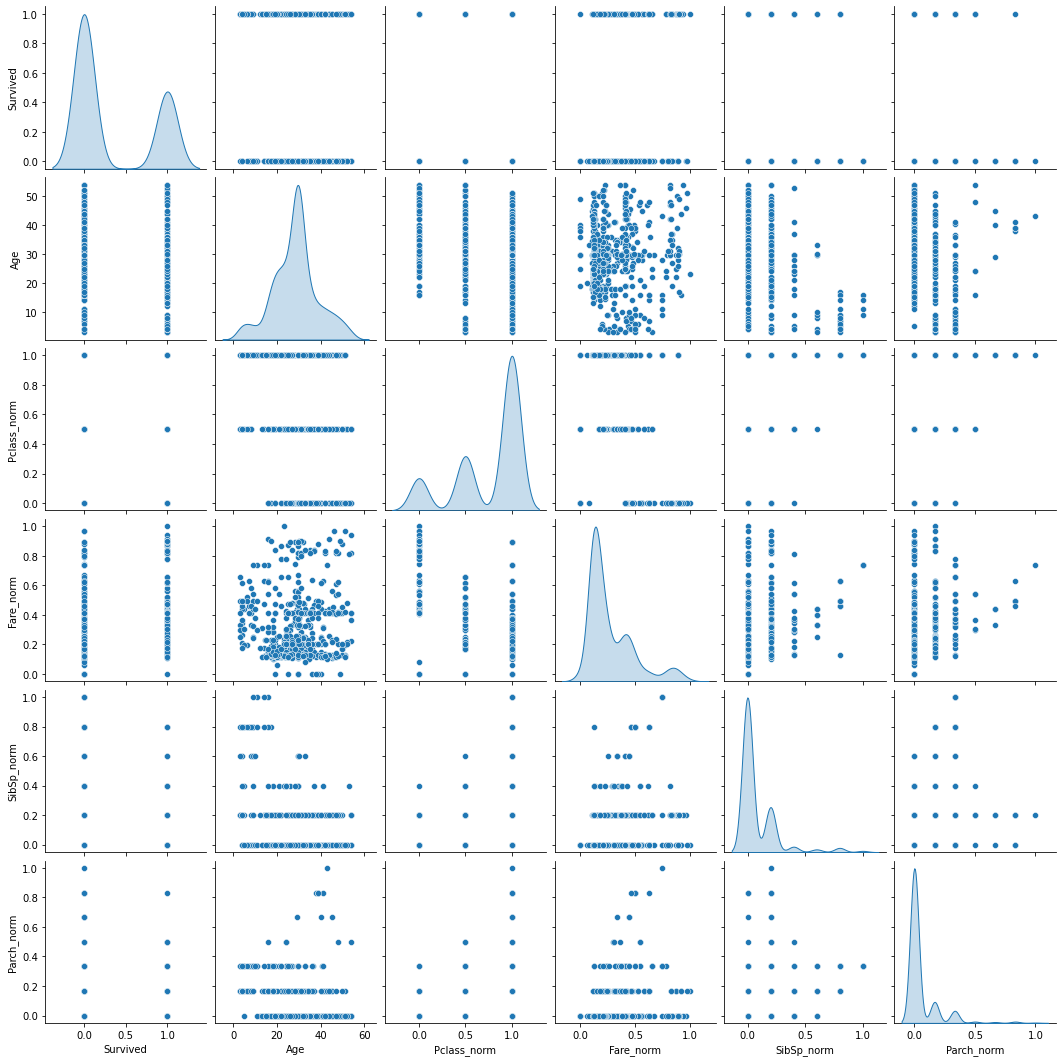

In [32]:
plt.figure(figsize=(17, 17))
sns.pairplot(df1, diag_kind='kde') 

<AxesSubplot:>

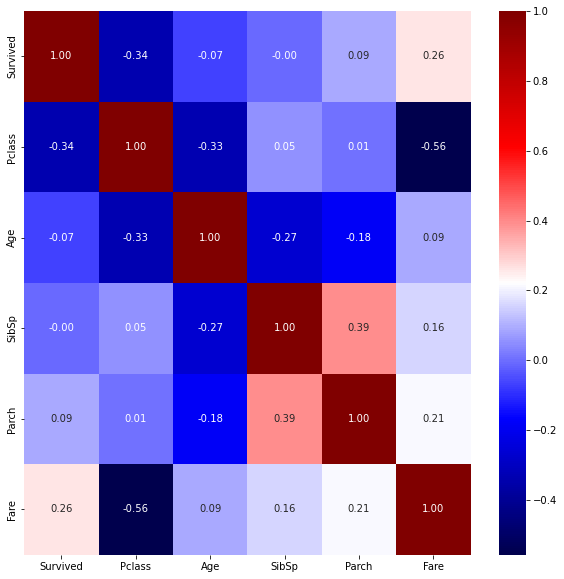

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='seismic', annot=True, fmt='.2f')

In [34]:
# get dummies on data
df2 = pd.get_dummies(df1)
df2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1.0,0.114429,0.2,0.0,0,1,0,0,1
2,1,26.000000,1.0,0.125082,0.0,0.0,1,0,0,0,1
3,1,35.000000,0.0,0.838091,0.2,0.0,1,0,0,0,1
4,0,35.000000,1.0,0.127055,0.0,0.0,0,1,0,0,1
5,0,29.699118,1.0,0.133499,0.0,0.0,0,1,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

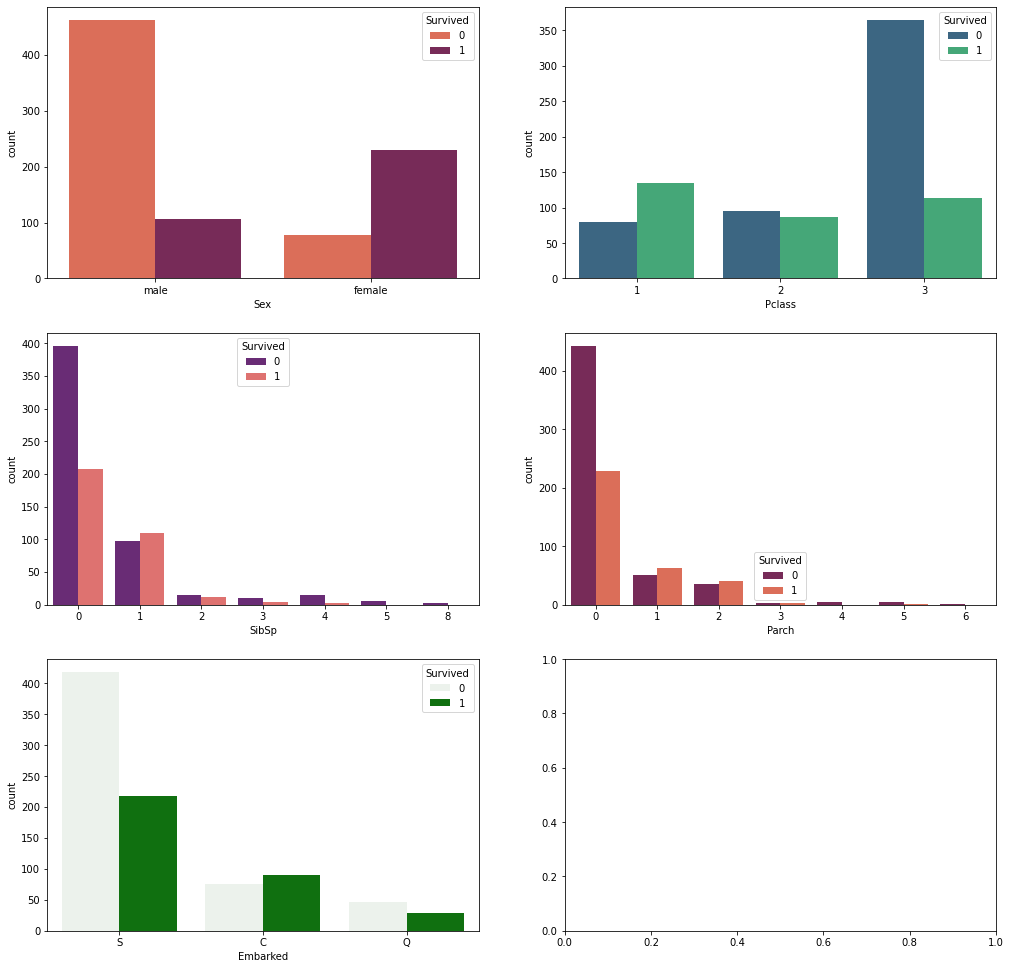

In [35]:
fig, ax =plt.subplots(nrows=3,ncols=2,figsize=(17,17))
sns.color_palette("rocket_r", as_cmap=True)
sns.countplot('Sex',hue='Survived',data=df,color='darkblue',ax=ax[0,0], palette="rocket_r")
sns.countplot('Pclass',hue='Survived',data=df,color='firebrick',ax=ax[0,1], palette="viridis")
sns.countplot('SibSp',hue='Survived',data=df,color='goldenrod',ax=ax[1,0], palette="magma")
sns.countplot('Parch',hue='Survived',data=df,color='black',ax=ax[1,1], palette="rocket")
sns.countplot('Embarked',hue='Survived',data=df,color='green',ax=ax[2,0])
plt.show()

##### 
1. The majority of survivors female
2. Class 1 has many survivors
3. Passengers who have 1 partner have many survivors
4. From the departure of Cherbourg (C) many survived too


In [36]:
df2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1.0,0.114429,0.2,0.0,0,1,0,0,1
2,1,26.000000,1.0,0.125082,0.0,0.0,1,0,0,0,1
3,1,35.000000,0.0,0.838091,0.2,0.0,1,0,0,0,1
4,0,35.000000,1.0,0.127055,0.0,0.0,0,1,0,0,1
5,0,29.699118,1.0,0.133499,0.0,0.0,0,1,0,1,0


In [37]:
# modification

# total number of family
df2["Family"] = df2["Parch_norm"] + df2["SibSp_norm"] + 1
df2["Family"] = df2["Family"].astype(int)

# number is alone
df2["is_alone"] = 0
df2.loc[df2["Family"] == 1 , "is_alone"] = 1

# change to int
df2[['Pclass_norm','SibSp_norm','Parch_norm']] = df2[['Pclass_norm','SibSp_norm','Parch_norm']].astype(int)


In [38]:
df2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family,is_alone
0,0,22.000000,1,0.114429,0,0,0,1,0,0,1,1,1
2,1,26.000000,1,0.125082,0,0,1,0,0,0,1,1,1
3,1,35.000000,0,0.838091,0,0,1,0,0,0,1,1,1
4,0,35.000000,1,0.127055,0,0,0,1,0,0,1,1,1
5,0,29.699118,1,0.133499,0,0,0,1,0,1,0,1,1


<AxesSubplot:>

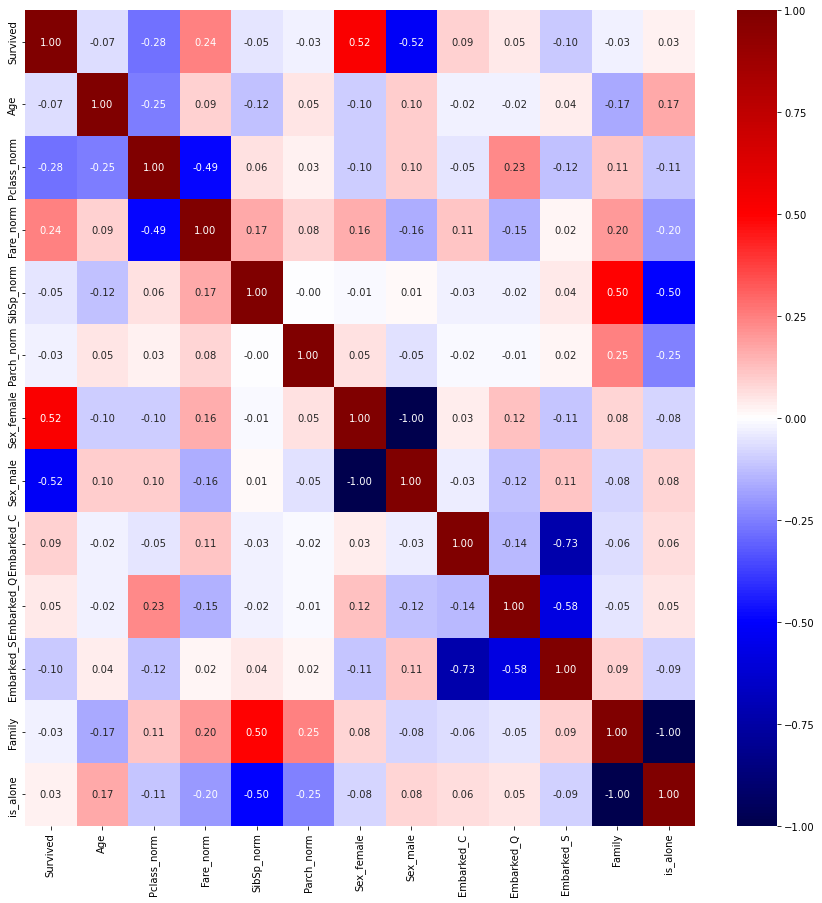

In [39]:
# see correlation
plt.figure(figsize=(15, 15))
sns.heatmap(df2.corr(), cmap='seismic', annot=True, fmt='.2f')

In [40]:
df2.head()

,Survived,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family,is_alone
0,0,22.000000,1,0.114429,0,0,0,1,0,0,1,1,1
2,1,26.000000,1,0.125082,0,0,1,0,0,0,1,1,1
3,1,35.000000,0,0.838091,0,0,1,0,0,0,1,1,1
4,0,35.000000,1,0.127055,0,0,0,1,0,0,1,1,1
5,0,29.699118,1,0.133499,0,0,0,1,0,1,0,1,1


## FEATURE ENG

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling

In [42]:
from sklearn.svm import SVC #MODEL SVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
# imbalance data
df2['Survived_class'] = df2['Survived'] > 0.8
df2['Survived_class'].value_counts()

False    474
True     237
Name: Survived_class, dtype: int64

In [44]:
X = df2[[col for col in df2.columns if (str(df2[col].dtype) != 'object') and col not in ['Survived', 'Survived_class']]]
y = df2['Survived_class'].values

In [45]:
X

,Age,Pclass_norm,Fare_norm,SibSp_norm,Parch_norm,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family,is_alone
0,22.000000,1,0.114429,0,0,0,1,0,0,1,1,1
2,26.000000,1,0.125082,0,0,1,0,0,0,1,1,1
3,35.000000,0,0.838091,0,0,1,0,0,0,1,1,1
4,35.000000,1,0.127055,0,0,0,1,0,0,1,1,1
5,29.699118,1,0.133499,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0.205182,0,0,0,1,0,0,1,1,1
887,19.000000,0,0.473498,0,0,1,0,0,0,1,1,1
888,29.699118,1,0.370117,0,0,1,0,0,0,1,1,1
889,26.000000,0,0.473498,0,0,0,1,1,0,0,1,1


In [46]:
print(X.shape)
print(y.shape)

(711, 12)
(711,)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

In [48]:
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

False    237
True     237
dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)) 

0.7902097902097902


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#MODEL RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8391608391608392


In [51]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8041958041958042

In [52]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8181818181818182

In [53]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7972027972027972

In [67]:
#DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense
# define the keras sequential model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=200, batch_size=14)

Epoch 1/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8340
Epoch 2/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8284
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8214
Epoch 4/200
51/51 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8397
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8326
Epoch 6/200
51/51 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8312
Epoch 7/200
51/51 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8256
Epoch 8/200
51/51 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8298
Epoch 9/200
51/51 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8270
Epoch 10/200
51/51 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8284
Epoch 11/

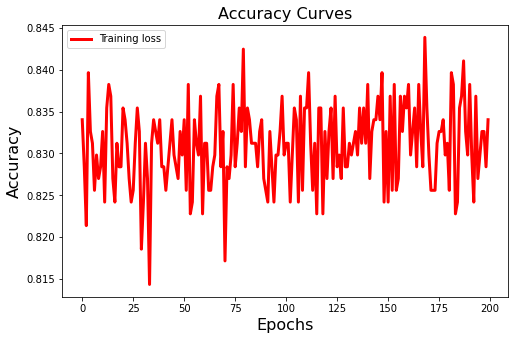

In [85]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [86]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') 

Accuracy: 83.92
